In [1]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics # Importa métrica para calcular acurácia - módulo do scikit-learn

In [2]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset

# 60/40

In [3]:
from sklearn.model_selection import train_test_split

treinamento, teste = train_test_split(Xone_hot_data, train_size=0.6, test_size=0.4, shuffle=False)

In [4]:
clf6040 = DecisionTreeClassifier(criterion='entropy')
clf6040 = clf6040.fit(treinamento, y.iloc[treinamento.index])

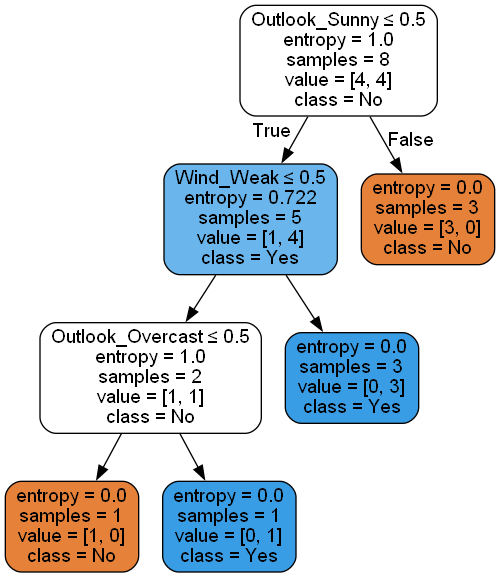

In [5]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf6040, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = treinamento.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropia_60-40.png')
Image(graph.create_png())

In [6]:
prev_treinamento = clf6040.predict(treinamento)
prev_teste = clf6040.predict(teste)

print(f'Acurácia para o conjunto de treinamento: {metrics.accuracy_score(y.iloc[treinamento.index], prev_treinamento)}')
print(f'Acurácia para o conjunto de teste: {metrics.accuracy_score(y.iloc[teste.index], prev_teste)}')

Acurácia para o conjunto de treinamento: 1.0
Acurácia para o conjunto de teste: 0.6666666666666666


# 80/20

In [7]:
treinamento, teste = train_test_split(Xone_hot_data, train_size=0.8, test_size=0.2, shuffle=False)

clf8020 = DecisionTreeClassifier(criterion='entropy')
clf8020 = clf8020.fit(treinamento, y.iloc[treinamento.index])

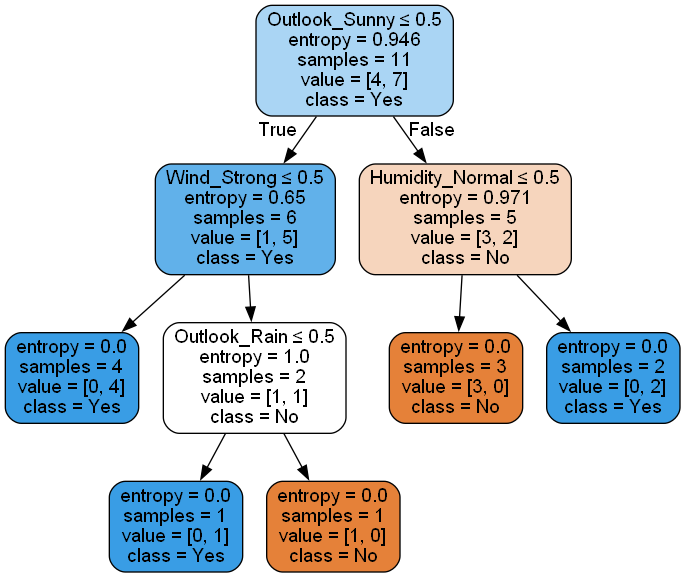

In [8]:
dot_data = StringIO()
export_graphviz(clf8020, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = treinamento.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropia_80-20.png')
Image(graph.create_png())

In [9]:
prev_treinamento = clf8020.predict(treinamento)
prev_teste = clf8020.predict(teste)

print(f'Acurácia para o conjunto de treinamento: {metrics.accuracy_score(y.iloc[treinamento.index], prev_treinamento)}')
print(f'Acurácia para o conjunto de teste: {metrics.accuracy_score(y.iloc[teste.index], prev_teste)}')

Acurácia para o conjunto de treinamento: 1.0
Acurácia para o conjunto de teste: 1.0
